# Web Scraping dan Preprocessing Serta Visualisasi


## Tampilan Website yang akan Di Scrapping

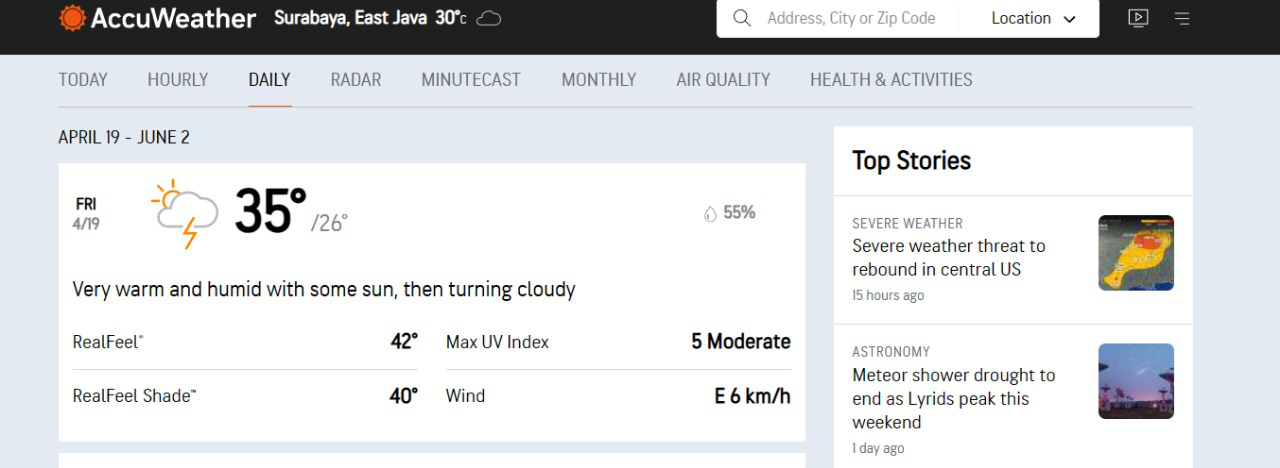

In [ ]:
import PIL.Image
PIL.Image.open("web.jpg")

Website yang akan dilakukan scraping adalah AccuWeather, yang menyediakan prakiraan cuaca untuk berbagai lokasi di dunia, termasuk Indonesia. Data cuaca yang akan diambil informasi dari web AccuWeather ini adalah wilayah Surabaya mulai dari tanggal 20 April 2024 hingga 2 Juni 2024 meliputi beberapa parameter penting, seperti suhu tinggi, suhu rendah, curah hujan, sensasi panas sebenarnya, indeks UV, arah angin, dan kecepatan angin. Berikut adalah penjelasan singkat tentang setiap parameter:
- Date: Tanggal prakiraan cuaca.
- temp_high: Suhu maksimum yang diharapkan pada hari itu, diukur dalam derajat Celsius.
- temp_low: Suhu minimum yang diharapkan pada hari itu, diukur dalam derajat Celsius.
- wtdrop: Persentase curah hujan yang diharapkan pada hari itu.
- real_feel: Sensasi panas sebenarnya yang dirasakan, diukur dalam derajat Celsius.
- uv_index_category: Kategori indeks UV, yang biasanya dibagi menjadi empat tingkat: low, moderate, high, dan very high.
- wind_direction: Arah dominan dari mana angin bertiup, diwakili oleh arah mata angin seperti East (E:timur), East-southeast (ESE:timur tenggara), Northwest (NW:barat laut), West-northwest (WNW:barat barat laut), Southeast (SE:tenggara), South-southeast (SSE:selatan tenggara)
- wind_speed: Kecepatan angin yang diharapkan, diukur dalam kilometer per jam.

## Web Scraping

In [1]:
import requests
import pandas as pd
url = 'https://www.accuweather.com/en/id/surabaya/203449/daily-weather-forecast/203449'
response = requests.get(url,headers={'user-agent':'hssh'})

In [2]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(response.content,'html.parser')

### Scrap tanggal perkiraan (date)

In [ ]:
date=soup.find_all('span',class_='module-header sub date')

In [ ]:
date=[i.text for i in date]
date

['4/19',
 '4/20',
 '4/21',
 '4/22',
 '4/23',
 '4/24',
 '4/25',
 '4/26',
 '4/27',
 '4/28',
 '4/29',
 '4/30',
 '5/1',
 '5/2',
 '5/3',
 '5/4',
 '5/5',
 '5/6',
 '5/7',
 '5/8',
 '5/9',
 '5/10',
 '5/11',
 '5/12',
 '5/13',
 '5/14',
 '5/15',
 '5/16',
 '5/17',
 '5/18',
 '5/19',
 '5/20',
 '5/21',
 '5/22',
 '5/23',
 '5/24',
 '5/25',
 '5/26',
 '5/27',
 '5/28',
 '5/29',
 '5/30',
 '5/31',
 '6/1',
 '6/2']

### Scrap suhu (temp)

In [ ]:
temp_high = soup.find_all('span',class_='high')
temp_low = soup.find_all('span',class_='low')
temp_high=[i.text for i in temp_high]
temp_low=[i.text for i in temp_low]
print(temp_high)
print(temp_low)

['35°', '35°', '34°', '34°', '34°', '33°', '33°', '34°', '33°', '34°', '36°', '36°', '36°', '36°', '34°', '35°', '34°', '34°', '34°', '34°', '35°', '34°', '34°', '35°', '35°', '35°', '35°', '35°', '35°', '35°', '35°', '34°', '34°', '35°', '35°', '36°', '35°', '35°', '36°', '35°', '35°', '36°', '36°', '35°', '35°']
['/26°', '/26°', '/25°', '/25°', '/25°', '/25°', '/25°', '/25°', '/26°', '/24°', '/21°', '/22°', '/22°', '/21°', '/22°', '/22°', '/22°', '/21°', '/21°', '/20°', '/20°', '/20°', '/20°', '/20°', '/22°', '/22°', '/22°', '/21°', '/21°', '/21°', '/20°', '/21°', '/21°', '/21°', '/21°', '/21°', '/21°', '/22°', '/22°', '/22°', '/22°', '/22°', '/21°', '/20°', '/20°']


### Scrap curah hujan (wtdrop)

In [ ]:
wt_drop=soup.find_all('div',class_='precip')
wt_drop=[i.text for i in wt_drop]
wt_drop

['\n\n\t\t25%\n\t',
 '\n\n\t\t60%\n\t',
 '\n\n\t\t72%\n\t',
 '\n\n\t\t78%\n\t',
 '\n\n\t\t40%\n\t',
 '\n\n\t\t70%\n\t',
 '\n\n\t\t47%\n\t',
 '\n\n\t\t43%\n\t',
 '\n\n\t\t61%\n\t',
 '\n\n\t\t58%\n\t',
 '\n\n\t\t62%\n\t',
 '\n\n\t\t61%\n\t',
 '\n\n\t\t40%\n\t',
 '\n\n\t\t2%\n\t',
 '\n\n\t\t57%\n\t',
 '\n\n\t\t65%\n\t',
 '\n\n\t\t64%\n\t',
 '\n\n\t\t61%\n\t',
 '\n\n\t\t40%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t20%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t20%\n\t',
 '\n\n\t\t40%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t20%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t10%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t20%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t25%\n\t',
 '\n\n\t\t65%\n\t',
 '\n\n\t\t58%\n\t',
 '\n\n\t\t61%\n\t']

### Scrap real feel, uv index, wind direction, dan wind speed

In [ ]:
scr=soup.find_all('span',class_='value')
scr

[<span class="value">32°</span>,
 <span class="value">52%</span>,
 <span class="value">ESE 7 km/h</span>,
 <span class="value">11 km/h</span>,
 <span class="value">41°</span>,
 <span class="value">39°</span>,
 <span class="value">8 Very High</span>,
 <span class="value">ESE 11 km/h</span>,
 <span class="value">40°</span>,
 <span class="value">39°</span>,
 <span class="value">5 Moderate</span>,
 <span class="value">ESE 13 km/h</span>,
 <span class="value">41°</span>,
 <span class="value">39°</span>,
 <span class="value">5 Moderate</span>,
 <span class="value">NW 11 km/h</span>,
 <span class="value">41°</span>,
 <span class="value">39°</span>,
 <span class="value">9 Very High</span>,
 <span class="value">WNW 9 km/h</span>,
 <span class="value">40°</span>,
 <span class="value">38°</span>,
 <span class="value">5 Moderate</span>,
 <span class="value">E 11 km/h</span>,
 <span class="value">40°</span>,
 <span class="value">39°</span>,
 <span class="value">3 Moderate</span>,
 <span class="valu

In [ ]:
real_feel = []
real_shade = []
uv_index = []
wind = []

for i in range(0, len(scr), 4):
    real_feel.append(scr[i].text)
    real_shade.append(scr[i+1].text)
    uv_index.append(scr[i+2].text)
    wind.append(scr[i+3].text)

In [ ]:
print(real_feel)
print(real_shade)
print(uv_index)
print(wind)

['32°', '41°', '40°', '41°', '41°', '40°', '40°', '41°', '39°', '40°', '42°', '42°', '41°', '42°', '39°', '40°', '40°', '40°', '39°', '37°', '37°', '36°', '35°', '38°', '39°', '40°', '39°', '39°', '38°', '37°', '37°', '37°', '37°', '38°', '39°', '39°', '39°', '39°', '39°', '39°', '39°', '39°', '41°', '40°', '41°']
['52%', '39°', '39°', '39°', '39°', '38°', '39°', '40°', '38°', '40°', '42°', '41°', '40°', '40°', '39°', '40°', '40°', '40°', '38°', '36°', '37°', '35°', '35°', '36°', '39°', '39°', '39°', '39°', '38°', '36°', '36°', '36°', '37°', '38°', '37°', '39°', '37°', '39°', '39°', '38°', '38°', '39°', '40°', '39°', '39°']
['ESE 7 km/h', '8 Very High', '5 Moderate', '5 Moderate', '9 Very High', '5 Moderate', '3 Moderate', '5 Moderate', '5 Moderate', '5 Moderate', '5 Moderate', '5 Moderate', '6 High', '9 Very High', '2 Low', '2 Low', '4 Moderate', '2 Low', '7 High', '5 Moderate', '4 Moderate', '2 Low', '2 Low', '8 Very High', '3 Moderate', '7 High', '4 Moderate', '6 High', '2 Low', '3 

### membentuk dataframe

In [ ]:
df = pd.DataFrame({'date':date,'temp_high':temp_high,'temp_low':temp_low,'wt_drop':wt_drop,'real_feel':real_feel,'uv_index':uv_index,'wind':wind})
df

,date,temp_high,temp_low,wt_drop,real_feel,uv_index,wind
0,4/19,35°,/26°,\n\n\t\t25%\n\t,32°,ESE 7 km/h,11 km/h
1,4/20,35°,/26°,\n\n\t\t60%\n\t,41°,8 Very High,ESE 11 km/h
2,4/21,34°,/25°,\n\n\t\t72%\n\t,40°,5 Moderate,ESE 13 km/h
3,4/22,34°,/25°,\n\n\t\t78%\n\t,41°,5 Moderate,NW 11 km/h
4,4/23,34°,/25°,\n\n\t\t40%\n\t,41°,9 Very High,WNW 9 km/h
5,4/24,33°,/25°,\n\n\t\t70%\n\t,40°,5 Moderate,E 11 km/h
6,4/25,33°,/25°,\n\n\t\t47%\n\t,40°,3 Moderate,E 9 km/h
7,4/26,34°,/25°,\n\n\t\t43%\n\t,41°,5 Moderate,E 11 km/h
8,4/27,33°,/26°,\n\n\t\t61%\n\t,39°,5 Moderate,E 11 km/h
9,4/28,34°,/24°,\n\n\t\t58%\n\t,40°,5 Moderate,E 6 km/h


## Data Preprocessing

### Mengubah format kolom tanggal (date)

In [ ]:
df['date']=pd.to_datetime(df['date']+'/2024')
df

,date,temp_high,temp_low,wt_drop,real_feel,uv_index,wind
0,2024-04-19,35°,/26°,\n\n\t\t25%\n\t,32°,ESE 7 km/h,11 km/h
1,2024-04-20,35°,/26°,\n\n\t\t60%\n\t,41°,8 Very High,ESE 11 km/h
2,2024-04-21,34°,/25°,\n\n\t\t72%\n\t,40°,5 Moderate,ESE 13 km/h
3,2024-04-22,34°,/25°,\n\n\t\t78%\n\t,41°,5 Moderate,NW 11 km/h
4,2024-04-23,34°,/25°,\n\n\t\t40%\n\t,41°,9 Very High,WNW 9 km/h
5,2024-04-24,33°,/25°,\n\n\t\t70%\n\t,40°,5 Moderate,E 11 km/h
6,2024-04-25,33°,/25°,\n\n\t\t47%\n\t,40°,3 Moderate,E 9 km/h
7,2024-04-26,34°,/25°,\n\n\t\t43%\n\t,41°,5 Moderate,E 11 km/h
8,2024-04-27,33°,/26°,\n\n\t\t61%\n\t,39°,5 Moderate,E 11 km/h
9,2024-04-28,34°,/24°,\n\n\t\t58%\n\t,40°,5 Moderate,E 6 km/h


### Memperbaiki kolom temp high, temp_low, wt_drop, real_feel, dan real_shade

In [ ]:
df['temp_high']= pd.to_numeric(df['temp_high'].str.replace('°',''))
df

,date,temp_high,temp_low,wt_drop,real_feel,uv_index,wind
0,2024-04-19,35,/26°,\n\n\t\t25%\n\t,32°,ESE 7 km/h,11 km/h
1,2024-04-20,35,/26°,\n\n\t\t60%\n\t,41°,8 Very High,ESE 11 km/h
2,2024-04-21,34,/25°,\n\n\t\t72%\n\t,40°,5 Moderate,ESE 13 km/h
3,2024-04-22,34,/25°,\n\n\t\t78%\n\t,41°,5 Moderate,NW 11 km/h
4,2024-04-23,34,/25°,\n\n\t\t40%\n\t,41°,9 Very High,WNW 9 km/h
5,2024-04-24,33,/25°,\n\n\t\t70%\n\t,40°,5 Moderate,E 11 km/h
6,2024-04-25,33,/25°,\n\n\t\t47%\n\t,40°,3 Moderate,E 9 km/h
7,2024-04-26,34,/25°,\n\n\t\t43%\n\t,41°,5 Moderate,E 11 km/h
8,2024-04-27,33,/26°,\n\n\t\t61%\n\t,39°,5 Moderate,E 11 km/h
9,2024-04-28,34,/24°,\n\n\t\t58%\n\t,40°,5 Moderate,E 6 km/h


In [ ]:
df['temp_low']= pd.to_numeric(df['temp_low'].str.replace('/','').str.replace('°',''))
df

,date,temp_high,temp_low,wt_drop,real_feel,uv_index,wind
0,2024-04-19,35,26,\n\n\t\t25%\n\t,32°,ESE 7 km/h,11 km/h
1,2024-04-20,35,26,\n\n\t\t60%\n\t,41°,8 Very High,ESE 11 km/h
2,2024-04-21,34,25,\n\n\t\t72%\n\t,40°,5 Moderate,ESE 13 km/h
3,2024-04-22,34,25,\n\n\t\t78%\n\t,41°,5 Moderate,NW 11 km/h
4,2024-04-23,34,25,\n\n\t\t40%\n\t,41°,9 Very High,WNW 9 km/h
5,2024-04-24,33,25,\n\n\t\t70%\n\t,40°,5 Moderate,E 11 km/h
6,2024-04-25,33,25,\n\n\t\t47%\n\t,40°,3 Moderate,E 9 km/h
7,2024-04-26,34,25,\n\n\t\t43%\n\t,41°,5 Moderate,E 11 km/h
8,2024-04-27,33,26,\n\n\t\t61%\n\t,39°,5 Moderate,E 11 km/h
9,2024-04-28,34,24,\n\n\t\t58%\n\t,40°,5 Moderate,E 6 km/h


In [ ]:
df['wt_drop']= pd.to_numeric(df['wt_drop'].str.replace('\n\n\t\t','').str.replace('%\n\t',''))
df

,date,temp_high,temp_low,wt_drop,real_feel,uv_index,wind
0,2024-04-19,35,26,25,32°,ESE 7 km/h,11 km/h
1,2024-04-20,35,26,60,41°,8 Very High,ESE 11 km/h
2,2024-04-21,34,25,72,40°,5 Moderate,ESE 13 km/h
3,2024-04-22,34,25,78,41°,5 Moderate,NW 11 km/h
4,2024-04-23,34,25,40,41°,9 Very High,WNW 9 km/h
5,2024-04-24,33,25,70,40°,5 Moderate,E 11 km/h
6,2024-04-25,33,25,47,40°,3 Moderate,E 9 km/h
7,2024-04-26,34,25,43,41°,5 Moderate,E 11 km/h
8,2024-04-27,33,26,61,39°,5 Moderate,E 11 km/h
9,2024-04-28,34,24,58,40°,5 Moderate,E 6 km/h


In [ ]:
df['real_feel'] = pd.to_numeric(df['real_feel'].astype(str).str.replace('°', ''))
df

,date,temp_high,temp_low,wt_drop,real_feel,uv_index,wind
0,2024-04-19,35,26,25,32,ESE 7 km/h,11 km/h
1,2024-04-20,35,26,60,41,8 Very High,ESE 11 km/h
2,2024-04-21,34,25,72,40,5 Moderate,ESE 13 km/h
3,2024-04-22,34,25,78,41,5 Moderate,NW 11 km/h
4,2024-04-23,34,25,40,41,9 Very High,WNW 9 km/h
5,2024-04-24,33,25,70,40,5 Moderate,E 11 km/h
6,2024-04-25,33,25,47,40,3 Moderate,E 9 km/h
7,2024-04-26,34,25,43,41,5 Moderate,E 11 km/h
8,2024-04-27,33,26,61,39,5 Moderate,E 11 km/h
9,2024-04-28,34,24,58,40,5 Moderate,E 6 km/h


### split nilai dan kategori pada kolom uv index number

In [ ]:
df['uv_index_number'] = df['uv_index'].str.extract('(\d+)')
kategori_map = {
    '0': 'Low',
    '1': 'Low',
    '2': 'Low',
    '3': 'Moderate',
    '4': 'Moderate',
    '5': 'Moderate',
    '6': 'High',
    '7': 'High',
    '8': 'Very High',
    '9': 'Very High',
    '10': 'Very High'
}
df['uv_index_category'] = df['uv_index_number'].map(kategori_map)

# Menghapus kolom uv_index_number jika tidak diperlukan lagi
df.drop(columns=['uv_index_number'], inplace=True)
df.drop(columns=['uv_index'], inplace=True)
df

,date,temp_high,temp_low,wt_drop,real_feel,wind,uv_index_category
0,2024-04-19,35,26,25,32,11 km/h,High
1,2024-04-20,35,26,60,41,ESE 11 km/h,Very High
2,2024-04-21,34,25,72,40,ESE 13 km/h,Moderate
3,2024-04-22,34,25,78,41,NW 11 km/h,Moderate
4,2024-04-23,34,25,40,41,WNW 9 km/h,Very High
5,2024-04-24,33,25,70,40,E 11 km/h,Moderate
6,2024-04-25,33,25,47,40,E 9 km/h,Moderate
7,2024-04-26,34,25,43,41,E 11 km/h,Moderate
8,2024-04-27,33,26,61,39,E 11 km/h,Moderate
9,2024-04-28,34,24,58,40,E 6 km/h,Moderate


### Split antara arah angin dan kecepatan pada kolom wind

In [ ]:
df = df.drop(df.index[0])
df[['wind_direction', 'wind_speed']] = df['wind'].str.extract(r'([NSEW]{1,3})\s(\d+)\s*km/h')
df['wind_speed'] = df['wind_speed'].astype(int)
df.drop(columns=['wind'], inplace=True)
df

,date,temp_high,temp_low,wt_drop,real_feel,uv_index_category,wind_direction,wind_speed
1,2024-04-20,35,26,60,41,Very High,ESE,11
2,2024-04-21,34,25,72,40,Moderate,ESE,13
3,2024-04-22,34,25,78,41,Moderate,NW,11
4,2024-04-23,34,25,40,41,Very High,WNW,9
5,2024-04-24,33,25,70,40,Moderate,E,11
6,2024-04-25,33,25,47,40,Moderate,E,9
7,2024-04-26,34,25,43,41,Moderate,E,11
8,2024-04-27,33,26,61,39,Moderate,E,11
9,2024-04-28,34,24,58,40,Moderate,E,6
10,2024-04-29,36,21,62,42,Moderate,E,6


### cek deskriptif data, missing value, format dan tipe data

In [ ]:
df.describe()

,date,temp_high,temp_low,wt_drop,real_feel,wind_speed
count,44,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2024-05-11 12:00:00,34.727273,21.954545,39.090909,39.227273,8.704545
min,2024-04-20 00:00:00,33.000000,20.000000,2.000000,35.000000,4.000000
25%,2024-04-30 18:00:00,34.000000,21.000000,25.000000,38.750000,7.000000
50%,2024-05-11 12:00:00,35.000000,21.500000,25.000000,39.000000,9.000000
75%,2024-05-22 06:00:00,35.000000,22.000000,60.250000,40.000000,9.500000
max,2024-06-02 00:00:00,36.000000,26.000000,78.000000,42.000000,15.000000
std,NaN,0.845333,1.777829,19.630089,1.626290,2.184294


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 1 to 44
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               44 non-null     datetime64[ns]
 1   temp_high          44 non-null     int64         
 2   temp_low           44 non-null     int64         
 3   wt_drop            44 non-null     int64         
 4   real_feel          44 non-null     int64         
 5   uv_index_category  44 non-null     object        
 6   wind_direction     44 non-null     object        
 7   wind_speed         44 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(2)
memory usage: 2.7+ KB


data sudah bersih, tidak ada missing value, dan tipe atau format data juga sudah sesuai

## Data Visualization

### V1. Bagaimana Pola Suhu Tinggi dan Suhu Rendah di Wilayah Surabaya Mulai dari 20 April 2024 hingga 2 Juni 2024?

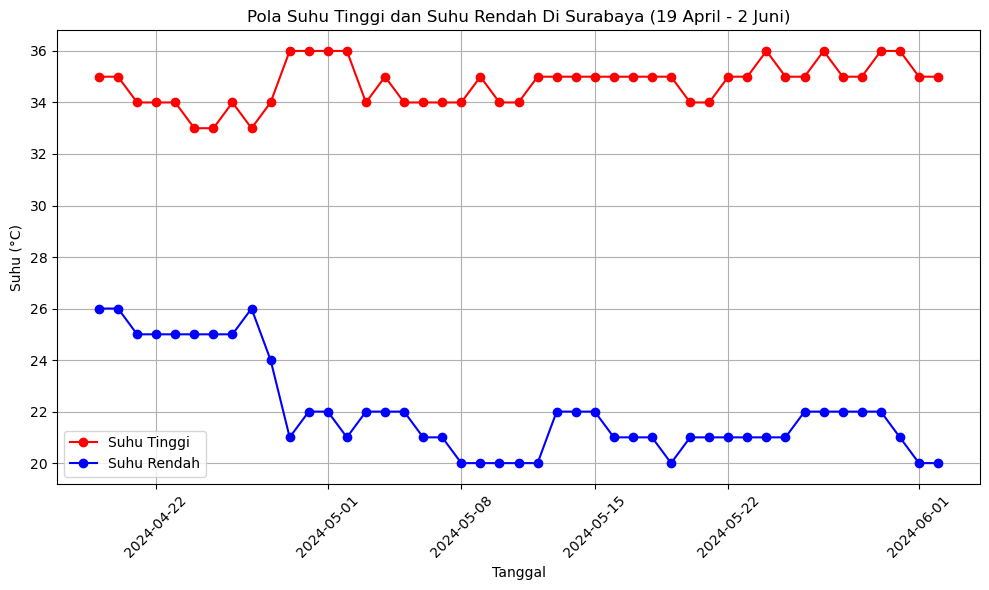

In [ ]:
import matplotlib.pyplot as plt

dates = df['date']
temp_high = df['temp_high']
temp_low = df['temp_low']

plt.figure(figsize=(10, 6))
plt.plot(dates, temp_high, color='red', label='Suhu Tinggi',marker='o')
plt.plot(dates, temp_low, color='blue', label='Suhu Rendah',marker='o')
plt.title('Pola Suhu Tinggi dan Suhu Rendah Di Surabaya (19 April - 2 Juni)')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Dari plot diatas kita bisa melihat bagaiaman pola suhu tinggi dan suhu rendah yang akan terjadi kedepannya di wilayah Surabaya mulai dari 19 April hingga 2 Juni 2024. Ternyata tidak terdapat kenaikan  atau penurunan suhu yang begitu signifikan, dapat dikatakn bahwa pola suhu berfluktuatif dimana puncak suhu sebesar 36 derajat diperkirakan terjadi di sekitar bulan Mei 2024.

### V2. Bagaimana Perbandingan antara Curah Hujan dengan Suhu di Wilayah Surabaya Mulai dari 20 April 2024 hingga 2 Juni 2024?

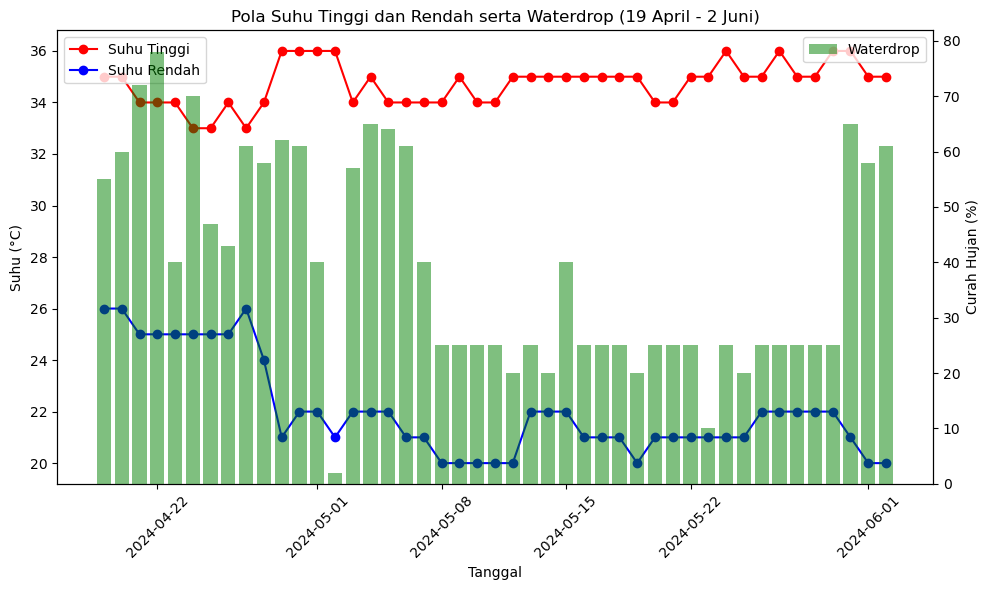

In [ ]:
dates = df['date']
temp_high = df['temp_high']
temp_low = df['temp_low']
wt_drop = df['wt_drop']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(dates, temp_high, color='red', label='Suhu Tinggi',marker='o')
ax1.plot(dates, temp_low, color='blue', label='Suhu Rendah',marker='o')
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Suhu (°C)')
ax1.set_title('Pola Suhu Tinggi dan Rendah serta Waterdrop (19 April - 2 Juni)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.bar(dates, wt_drop, color='green', alpha=0.5, label='Waterdrop')
ax2.set_ylabel('Curah Hujan (%)')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

Apabila dibandingkan dengan persentase curah hujan, kita bisa melihat bahwa di wilayah Surabaya, persentase curah hujannya diperkirakan turun secara drastis pada tanggal 1 Mei, hanya mencapai sekitar 2%. Terdapat hubungan antara curah hujan dan pola suhu yang tergambar pada plot diatas yakni ketika suhu tinggi, curah hujan cenderung rendah, dan sebaliknya, ketika curah hujan tinggi, suhu cenderung rendah.

### V3. Bagaimana Perbandingan Rata-rata Suhu, Sensasi Panas Sebenarnya, dan Curah Hujan berdasarkan Kategori Indeks UV di Wilayah Surabaya Mulai dari 20 April 2024 hingga 2 Juni 2024?

In [ ]:
avg_data = df.groupby('uv_index_category').agg({'temp_high': 'mean', 'real_feel': 'mean', 'wt_drop': 'mean'}).reset_index()
print(avg_data)

  uv_index_category  temp_high  real_feel    wt_drop
0              High  35.333333  39.833333  35.833333
1               Low  34.500000  38.125000  38.500000
2          Moderate  34.565217  39.260870  42.652174
3         Very High  35.000000  40.125000  33.875000


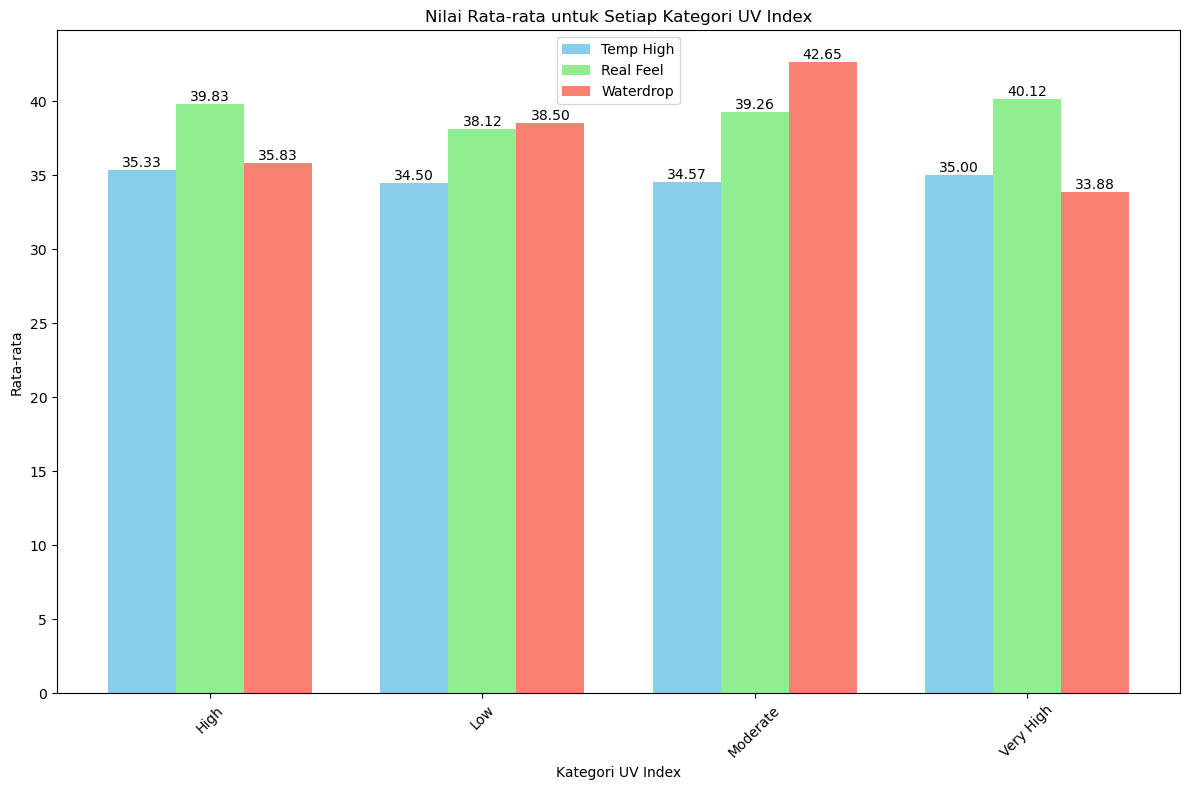

In [ ]:
import numpy as np

bar_width = 0.25
index = np.arange(len(avg_data['uv_index_category']))
plt.figure(figsize=(12, 8))
bars1 = plt.bar(index - bar_width, avg_data['temp_high'], bar_width, color='skyblue', label='Temp High')
bars2 = plt.bar(index, avg_data['real_feel'], bar_width, color='lightgreen', label='Real Feel')
bars3 = plt.bar(index + bar_width, avg_data['wt_drop'], bar_width, color='salmon', label='Waterdrop')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom')

plt.title('Nilai Rata-rata untuk Setiap Kategori UV Index')
plt.xlabel('Kategori UV Index')
plt.ylabel('Rata-rata')
plt.xticks(index, avg_data['uv_index_category'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Ketika membandingkan suhu tinggi, sensasi panas, dan curah hujan berdasarkan kategori indeks UV, terlihat bahwa dalam setiap kategori indeks UV, suhu tinggi selalu lebih rendah daripada sensasi panasnya. Hal ini menunjukkan bahwa dalam periode April hingga Juni di wilayah Surabaya, akan terjadi situasi di mana meskipun suhu tinggi, sensasi panas yang dirasakan masyarakat akan lebih tinggi lagi. Selain itu, terlihat bahwa curah hujan tertinggi terjadi pada saat kategori indeks UV sedang (moderate).

### V4. Bagaimana Perbandingan antara Kecepatan Angin dengan Sensasi Panas Sebenarnya berdasarkan Arah Angin di Wilayah Surabaya Mulai dari 20 April 2024 hingga 2 Juni 2024?

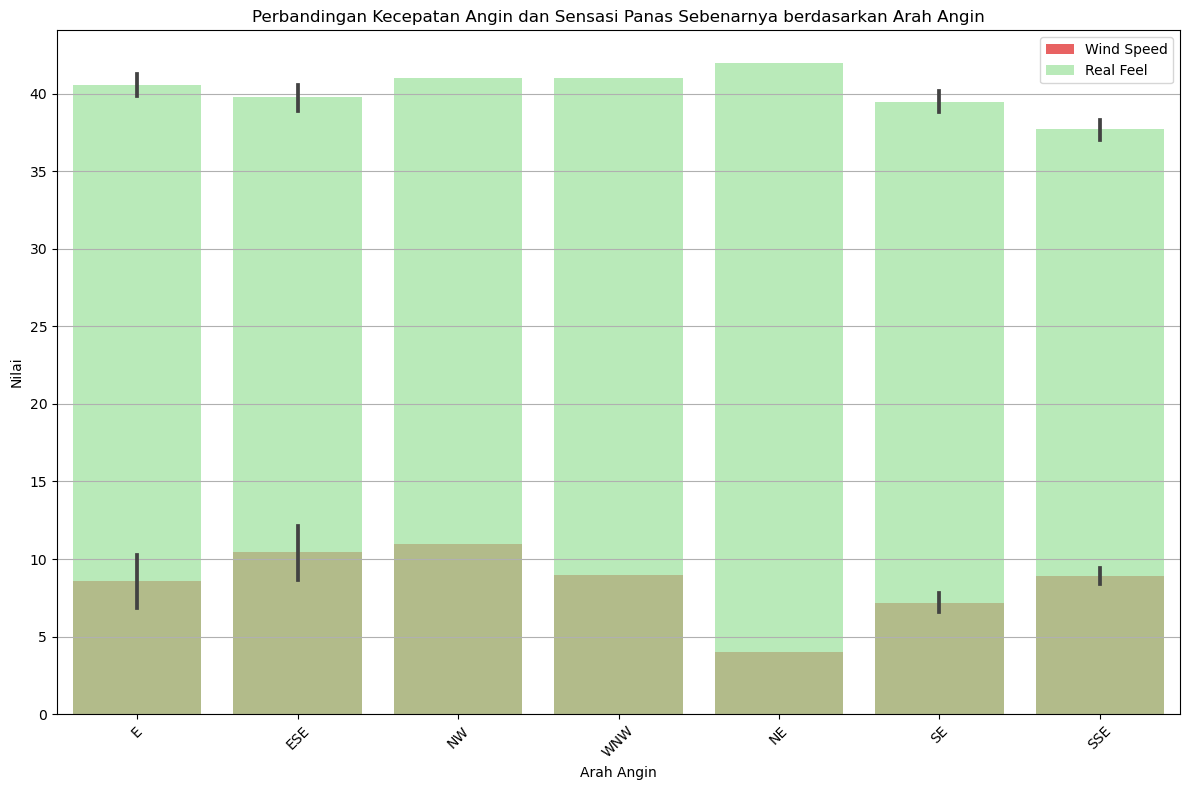

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='wind_direction', y='wind_speed', alpha=0.7, color='red', label='Wind Speed')
sns.barplot(data=df, x='wind_direction', y='real_feel', alpha=0.7, color='lightgreen', label='Real Feel')
plt.title('Perbandingan Kecepatan Angin dan Sensasi Panas Sebenarnya berdasarkan Arah Angin')
plt.xlabel('Arah Angin')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Sensasi panas tertinggi yang akan dirasakan oleh masyarakat Surabaya pada periode April - Juni kedepan dipengaruhi oleh angin yang bertiup dari wilayah NW (Northwest: barat laut), sementara angin dari NE (Northeast: timur laut) cenderung membawa sensasi panas yang lebih rendah. Selain itu, angin dari NE (timur laut) memiliki kecepatan yang paling tinggi. Dari visualisasi di atas, terlihat juga pola hubungan antara kecepatan angin dan sensasi panas untuk setiap arah angin lainnya yang akan terjadi di wilayah Surabaya dalam periode April-Juni.

### V5. Bagaimana Perbandingan Distribusi Suhu, Curah Hujan,Sensasi Panas Sebenarnya dan Kecepatan Angin di Wilayah Surabaya Mulai dari 20 April 2024 hingga 2 Juni 2024?

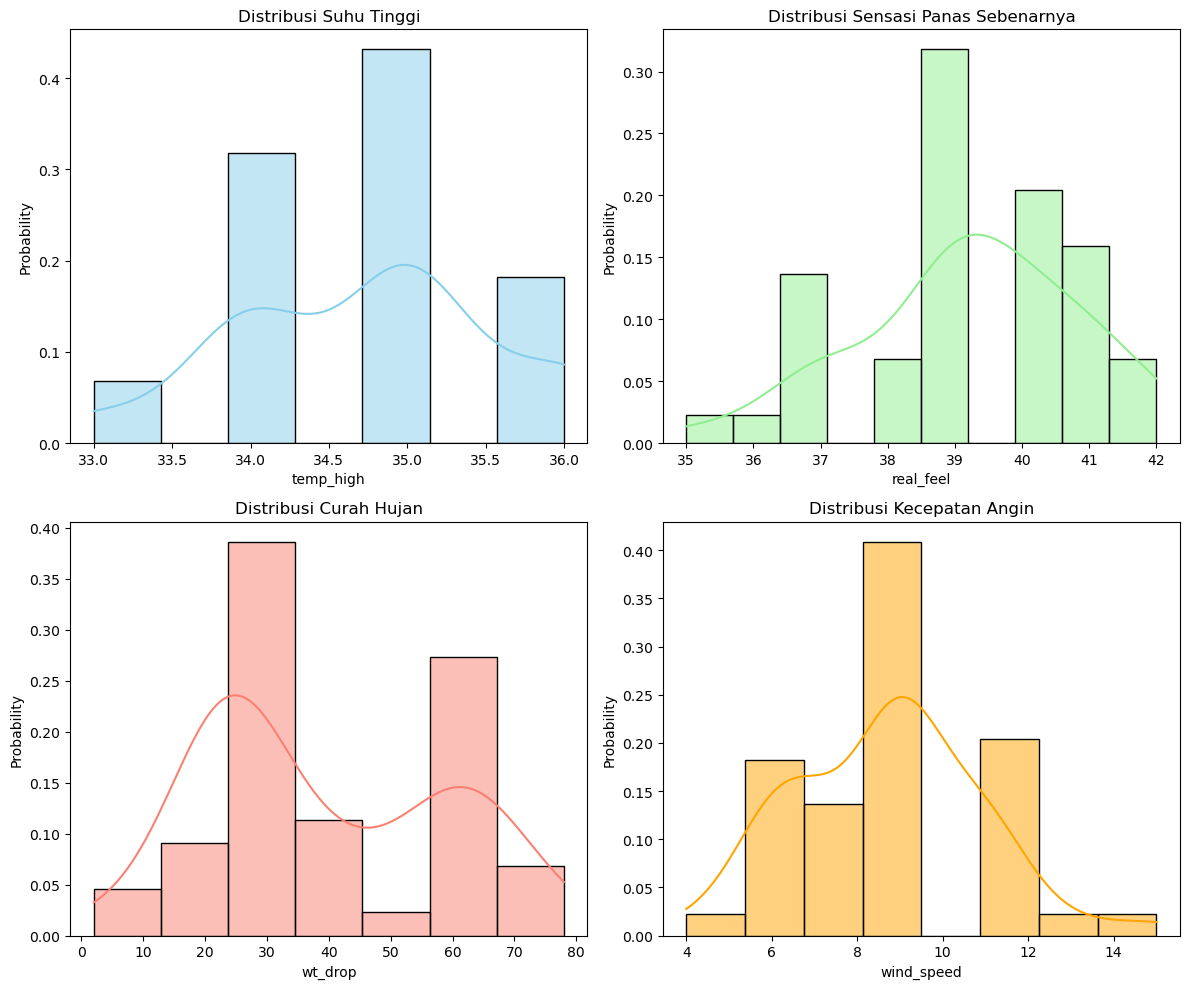

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['temp_high'], stat='probability', kde=True, color='skyblue')
plt.title('Distribusi Suhu Tinggi')

plt.subplot(2, 2, 2)
sns.histplot(df['real_feel'], stat='probability', kde=True, color='lightgreen')
plt.title('Distribusi Sensasi Panas Sebenarnya')

plt.subplot(2, 2, 3)
sns.histplot(df['wt_drop'], stat='probability', kde=True, color='salmon')
plt.title('Distribusi Curah Hujan')

plt.subplot(2, 2, 4)
sns.histplot(df['wind_speed'], stat='probability', kde=True, color='orange')
plt.title('Distribusi Kecepatan Angin')

plt.tight_layout()
plt.show()

Dari plot di atas, kita dapat membandingkan distribusi suhu, sensasi panas, curah hujan, dan kecepatan angin untuk menganalisis pola dan tren cuaca di wilayah Surabaya dari April hingga Juni. Probabilitas tertinggi untuk suhu adalah sekitar 35 derajat Celsius, sementara sensasi panas tertinggi mencapai 39 derajat Celsius. Ini menunjukkan bahwa wilayah Surabaya kemungkinan akan sering mengalami suhu dan sensasi panas pada kisaran tersebut selama periode April-Juni. Probabilitas tertinggi untuk curah hujan ada di sekitar 30%, sedangkan kecepatan angin rata-rata sekitar 9 km/jam. Ini juga menunjukkan bahwa kondisi cuaca umumnya cenderung stabil dengan curah hujan moderat dan angin yang tidak terlalu kencang selama periode tersebut.

## Kesimpulan

Secara umum, analisis cuaca untuk wilayah Surabaya dari April hingga Juni 2024 menghasilkan beberapa temuan:
- Tidak ada fluktuasi suhu yang signifikan selama rentang waktu tersebut, dengan suhu tinggi dan rendah cenderung tetap stabil. Puncak suhu diperkirakan mencapai sekitar 36 derajat Celsius pada bulan Mei.
- Terdapat kecenderungan bahwa ketika suhu tinggi, curah hujan cenderung rendah, dan sebaliknya, ketika curah hujan tinggi, suhu cenderung rendah. Ini menunjukkan hubungan invers antara suhu dan curah hujan.
- Sensasi panas yang dirasakan oleh masyarakat cenderung lebih tinggi daripada suhu aktual, terutama pada kategori indeks UV yang lebih tinggi. Hal ini menunjukkan bahwa faktor lain seperti kelembaban udara dan radiasi matahari juga berkontribusi pada sensasi panas.
- Sensasi panas tertinggi dipengaruhi oleh angin dari arah Northwest (barat laut), sementara kecepatan angin tertinggi terjadi pada angin dari arah Northeast (timur laut). Arah angin memiliki pengaruh yang signifikan terhadap sensasi panas yang dirasakan oleh masyarakat.
- Secara keseluruhan, distribusi suhu, sensasi panas, curah hujan, dan kecepatan angin menunjukkan kondisi cuaca yang stabil dengan sedikit fluktuasi selama periode April hingga Juni 2024. Ini mengindikasikan bahwa wilayah Surabaya dapat mengharapkan cuaca yang relatif konsisten selama periode tersebut.